<a href="https://colab.research.google.com/github/CaiqueBorges/MC_alunos_ufrn/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #Hierarchical
from sklearn.mixture import GaussianMixture #EM
from sklearn.metrics import silhouette_samples, silhouette_score

# LEITURA DO DATASET

In [2]:
url = 'https://raw.githubusercontent.com/CaiqueBorges/MC_alunos_ufrn/main/input/discentes-2019.csv'
dados = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip', sep=';')
dataset = dados.copy()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             16020 non-null  int64  
 1   nome_discente         16020 non-null  object 
 2   sexo                  16020 non-null  object 
 3   ano_ingresso          16020 non-null  int64  
 4   periodo_ingresso      15976 non-null  float64
 5   forma_ingresso        16019 non-null  object 
 6   tipo_discente         16020 non-null  object 
 7   status                16020 non-null  object 
 8   sigla_nivel_ensino    16020 non-null  object 
 9   nivel_ensino          16020 non-null  object 
 10  id_curso              14616 non-null  float64
 11  nome_curso            14616 non-null  object 
 12  modalidade_educacao   14616 non-null  object 
 13  id_unidade            14616 non-null  float64
 14  nome_unidade          14616 non-null  object 
 15  id_unidade_gestora 

# AGRUPAMENTO - CLUSTERING

In [ ]:
#
dados.drop(columns=['matricula', 'nome_discente', 'id_curso', 'id_unidade',
                    'id_unidade_gestora', 'sigla_nivel_ensino', 'nome_unidade_gestora',
                    'nome_curso', 'nome_unidade', 'periodo_ingresso', 'tipo_discente',
                    'forma_ingresso', 'sexo', 'ano_ingresso'], inplace=True)
# dados[['sexo']] = dados[['sexo']].fillna(0).astype(bool)
# dados[['ano_ingresso']] = dados[['ano_ingresso']].fillna(0).astype(int)
dados = dados[dados!=0].dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14616 entries, 0 to 16019
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               14616 non-null  object
 1   nivel_ensino         14616 non-null  object
 2   modalidade_educacao  14616 non-null  object
dtypes: object(3)
memory usage: 456.8+ KB


In [ ]:
# Criando lista com colunas numéricas
tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
num_cols = dados.select_dtypes(include=tipos_numericos)
num_cols = list(num_cols.columns)

# Normalizando colunas numéricas
dados[num_cols] = dados[num_cols].apply(minmax_scale)
dados.head()

,status,nivel_ensino,modalidade_educacao
0,CANCELADO,TÉCNICO,SEMI-PRESENCIAL
1,ATIVO,GRADUAÇÃO,PRESENCIAL
2,CANCELADO,GRADUAÇÃO,PRESENCIAL
3,ATIVO,FORMAÇÃO COMPLEMENTAR,PRESENCIAL
4,TRANCADO,GRADUAÇÃO,PRESENCIAL


In [ ]:
# Obtendo os nomes das colunas Categóricas
tipos_categoricos = ['object']
cat_cols = dados.select_dtypes(include=tipos_categoricos)

# Binarizando os atributos categóricos
categoricoToBinary = pd.get_dummies(cat_cols)
dados = dados.join(categoricoToBinary)

# Removendo os atributos categóricos originais
dados.drop(cat_cols.columns.to_list(), axis=1, inplace=True)

dados.head()

,status_ATIVO,status_ATIVO - FORMANDO,status_CADASTRADO,status_CANCELADO,status_CONCLUÍDO,status_DEFENDIDO,status_FORMADO,status_TRANCADO,nivel_ensino_DOUTORADO,nivel_ensino_FORMAÇÃO COMPLEMENTAR,nivel_ensino_FUNDAMENTAL,nivel_ensino_GRADUAÇÃO,nivel_ensino_LATO SENSU,nivel_ensino_MESTRADO,nivel_ensino_RESIDÊNCIA,nivel_ensino_TÉCNICO,nivel_ensino_TÉCNICO INTEGRADO,modalidade_educacao_A DISTÂNCIA,modalidade_educacao_PRESENCIAL,modalidade_educacao_SEMI-PRESENCIAL
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14616 entries, 0 to 16019
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   status_ATIVO                         14616 non-null  uint8
 1   status_ATIVO - FORMANDO              14616 non-null  uint8
 2   status_CADASTRADO                    14616 non-null  uint8
 3   status_CANCELADO                     14616 non-null  uint8
 4   status_CONCLUÍDO                     14616 non-null  uint8
 5   status_DEFENDIDO                     14616 non-null  uint8
 6   status_FORMADO                       14616 non-null  uint8
 7   status_TRANCADO                      14616 non-null  uint8
 8   nivel_ensino_DOUTORADO               14616 non-null  uint8
 9   nivel_ensino_FORMAÇÃO COMPLEMENTAR   14616 non-null  uint8
 10  nivel_ensino_FUNDAMENTAL             14616 non-null  uint8
 11  nivel_ensino_GRADUAÇÃO               14616 non-null  u

In [ ]:
# Salvando dados transformados
df = pd.DataFrame(dados)
df.to_csv('/content/discentes-2019-tratado.csv', index=False)

In [ ]:
# Criando listas para salvar os índices DB
db_hiera_avLink = []
db_Kmeans = []
db_em = []

# DB Hieráquico Average
for i in list(range(2, 21)):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='average')
    cluster.fit(dados)
    labels = cluster.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_hiera_avLink.append(value)
    print("DB_Hiera_average  (k = %d): %0.3f" % (i, value))

DB_Hiera_average  (k = 2): 0.792
DB_Hiera_average  (k = 3): 1.055
DB_Hiera_average  (k = 4): 1.166
DB_Hiera_average  (k = 5): 1.174
DB_Hiera_average  (k = 6): 1.240
DB_Hiera_average  (k = 7): 1.128
DB_Hiera_average  (k = 8): 0.984
DB_Hiera_average  (k = 9): 0.936
DB_Hiera_average  (k = 10): 0.903
DB_Hiera_average  (k = 11): 0.920
DB_Hiera_average  (k = 12): 0.891
DB_Hiera_average  (k = 13): 0.836
DB_Hiera_average  (k = 14): 0.830
DB_Hiera_average  (k = 15): 0.794
DB_Hiera_average  (k = 16): 0.712
DB_Hiera_average  (k = 17): 0.693
DB_Hiera_average  (k = 18): 0.731
DB_Hiera_average  (k = 19): 0.712
DB_Hiera_average  (k = 20): 0.716


In [ ]:
# DB K-means
for i in list(range(2, 21)):
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=37)
    km.fit(dados)
    labels = km.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_Kmeans.append(value)
    print("DB_K-means_s37 (k = %d): %0.3f" % (i, value))

DB_K-means_s37 (k = 2): 1.393
DB_K-means_s37 (k = 3): 1.210
DB_K-means_s37 (k = 4): 1.023
DB_K-means_s37 (k = 5): 1.114
DB_K-means_s37 (k = 6): 1.062
DB_K-means_s37 (k = 7): 1.022
DB_K-means_s37 (k = 8): 0.930
DB_K-means_s37 (k = 9): 0.931
DB_K-means_s37 (k = 10): 0.941
DB_K-means_s37 (k = 11): 0.931
DB_K-means_s37 (k = 12): 0.881
DB_K-means_s37 (k = 13): 0.809
DB_K-means_s37 (k = 14): 0.793
DB_K-means_s37 (k = 15): 0.734
DB_K-means_s37 (k = 16): 0.826
DB_K-means_s37 (k = 17): 0.797
DB_K-means_s37 (k = 18): 0.750
DB_K-means_s37 (k = 19): 0.701
DB_K-means_s37 (k = 20): 0.653


In [ ]:
# DB EM
for i in list(range(2, 21)):
    gmm = GaussianMixture(n_components = i, covariance_type='full', init_params='kmeans')
    gmm.fit(dados)
    labels = gmm.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_em.append(value)
    print("DB_EM (k = %d): %0.3f" % (i, value))

DB_EM (k = 2): 1.789
DB_EM (k = 3): 1.208
DB_EM (k = 4): 1.102
DB_EM (k = 5): 0.914
DB_EM (k = 6): 0.945
DB_EM (k = 7): 1.006
DB_EM (k = 8): 0.875
DB_EM (k = 9): 0.947
DB_EM (k = 10): 0.717
DB_EM (k = 11): 0.798
DB_EM (k = 12): 0.742
DB_EM (k = 13): 0.739
DB_EM (k = 14): 0.719
DB_EM (k = 15): 0.799
DB_EM (k = 16): 0.718
DB_EM (k = 17): 0.776
DB_EM (k = 18): 0.752
DB_EM (k = 19): 0.703
DB_EM (k = 20): 0.661


In [ ]:
# Calculando média dos índices
print("Média Hierárquico Average: %0.4f" % (np.mean(db_hiera_avLink)))
print("Média K-means: %0.4f" % (np.mean(db_Kmeans)))
print("Média EM: %0.4f" % (np.mean(db_em)))

Média Hierárquico Average: 0.9059
Média K-means: 0.9210
Média EM: 0.8900


Text(0, 0.5, 'index')

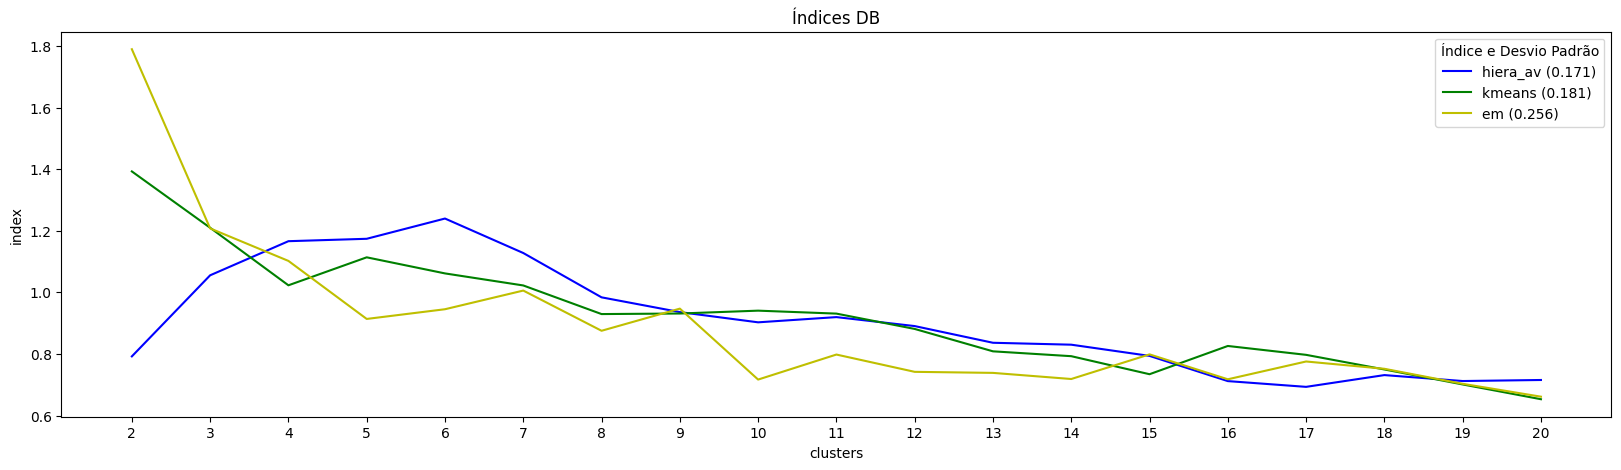

In [ ]:
# Plotar gráfico
x = list(range(2, 21))
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(x, db_hiera_avLink, 'b-', label='hiera_av (%.3f)' % np.std(db_hiera_avLink))
plt.plot(x, db_Kmeans, 'g-', label='kmeans (%.3f)' % np.std(db_Kmeans))
plt.plot(x, db_em, 'y-', label='em (%.3f)' % np.std(db_em))
plt.xticks(range(2,21))
plt.title("Índices DB")
plt.legend()
plt.legend(title="Índice e Desvio Padrão")
plt.xlabel("clusters")
plt.ylabel("index")

In [ ]:
# Criando listas para salvar os índices Silhouette
si_hiera_avLink = []
si_Kmeans = []
si_em = []

# Si Hierarquico Average
for i in list(range(2, 21)):
    ha = AgglomerativeClustering(n_clusters=i, linkage='average')
    ha.fit(dados)
    labels = cluster.fit_predict(dados)
    value = silhouette_score(dados, ha.labels_)
    si_hiera_avLink.append(value)
    print('Silhouette_Hiera_average %dk - %.3f' % (i, value))

Silhouette_Hiera_average 2k - 0.346
Silhouette_Hiera_average 3k - 0.338
Silhouette_Hiera_average 4k - 0.365
Silhouette_Hiera_average 5k - 0.365
Silhouette_Hiera_average 6k - 0.444
Silhouette_Hiera_average 7k - 0.444
Silhouette_Hiera_average 8k - 0.434
Silhouette_Hiera_average 9k - 0.451
Silhouette_Hiera_average 10k - 0.459
Silhouette_Hiera_average 11k - 0.463
Silhouette_Hiera_average 12k - 0.482
Silhouette_Hiera_average 13k - 0.501
Silhouette_Hiera_average 14k - 0.496
Silhouette_Hiera_average 15k - 0.511
Silhouette_Hiera_average 16k - 0.543
Silhouette_Hiera_average 17k - 0.552
Silhouette_Hiera_average 18k - 0.571
Silhouette_Hiera_average 19k - 0.580
Silhouette_Hiera_average 20k - 0.583


In [ ]:
# Si K-means
for i in list(range(2, 21)):
  km = KMeans(n_clusters=i, init='k-means++', n_init=300, max_iter=10, random_state=37)
  km.fit_predict(dados)
  value = silhouette_score(dados, km.labels_)
  si_Kmeans.append(value)
  print('Silhouette_k-Means_s37 %dk - %.3f' % (i, value))

Silhouette_k-Means_s37 2k - 0.318
Silhouette_k-Means_s37 3k - 0.449
Silhouette_k-Means_s37 4k - 0.498
Silhouette_k-Means_s37 5k - 0.558
Silhouette_k-Means_s37 6k - 0.597
Silhouette_k-Means_s37 7k - 0.629
Silhouette_k-Means_s37 8k - 0.662
Silhouette_k-Means_s37 9k - 0.705
Silhouette_k-Means_s37 10k - 0.744
Silhouette_k-Means_s37 11k - 0.773
Silhouette_k-Means_s37 12k - 0.794
Silhouette_k-Means_s37 13k - 0.819
Silhouette_k-Means_s37 14k - 0.834
Silhouette_k-Means_s37 15k - 0.853
Silhouette_k-Means_s37 16k - 0.865
Silhouette_k-Means_s37 17k - 0.878
Silhouette_k-Means_s37 18k - 0.891
Silhouette_k-Means_s37 19k - 0.902
Silhouette_k-Means_s37 20k - 0.915


In [ ]:
# Si EM
for i in list(range(2, 21)):
    gmm = GaussianMixture(n_components=i, covariance_type='full', init_params='kmeans')
    gmm.fit(dados)
    labels = gmm.fit_predict(dados)
    value = silhouette_score(dados, labels)
    si_em.append(value)
    print('Silhouette_EM %dk - %.3f' % (i, value))

Silhouette_EM 2k - 0.305
Silhouette_EM 3k - 0.360
Silhouette_EM 4k - 0.492
Silhouette_EM 5k - 0.528
Silhouette_EM 6k - 0.532
Silhouette_EM 7k - 0.535
Silhouette_EM 8k - 0.643
Silhouette_EM 9k - 0.676
Silhouette_EM 10k - 0.720
Silhouette_EM 11k - 0.740
Silhouette_EM 12k - 0.775
Silhouette_EM 13k - 0.802
Silhouette_EM 14k - 0.817
Silhouette_EM 15k - 0.841
Silhouette_EM 16k - 0.857
Silhouette_EM 17k - 0.869
Silhouette_EM 18k - 0.889
Silhouette_EM 19k - 0.888
Silhouette_EM 20k - 0.913


In [ ]:
# Calculando média dos índices Silhouette
print("Média Hierárquico Average: %0.4f" % (np.mean(si_hiera_avLink)))
print("Média K-means: %0.4f" % (np.mean(si_Kmeans)))
print("Média EM: %0.4f" % (np.mean(si_em)))

Média Hierárquico Average: 0.4699
Média K-means: 0.7203
Média EM: 0.6938


Text(0, 0.5, 'Index Value')

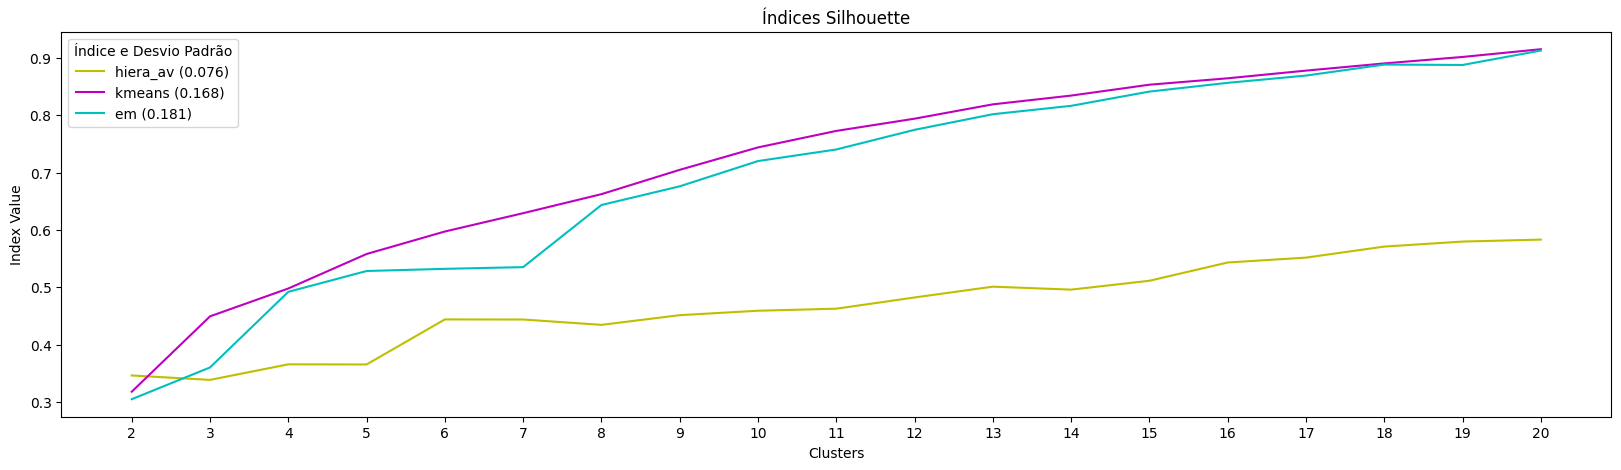

In [ ]:
# Plotar gráfico Silhouette
plt.plot(x, si_hiera_avLink, 'y-', label='hiera_av (%.3f)' % np.std(si_hiera_avLink))
plt.plot(x, si_Kmeans, 'm-', label='kmeans (%.3f)' % np.std(si_Kmeans))
plt.plot(x, si_em, 'c-', label='em (%.3f)' % np.std(si_em))
plt.xticks(range(2,21))
plt.title("Índices Silhouette")
plt.legend(title="Índice e Desvio Padrão")
plt.xlabel("Clusters")
plt.ylabel("Index Value")

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster.fit(dados)
labels = cluster.fit_predict(dados)
print(labels)
print(metrics.davies_bouldin_score(dados, labels))

[1 0 0 ... 0 0 0]
1.055376114316262


In [ ]:
# juntando os labels com o restante do dataset
dados["cluster"] = cluster.labels_
#dados["Cluster"] = 'cluster' + dados["Cluster"].astype(str)
# Visualização dos novos atributos
dados.head()

,status_ATIVO,status_ATIVO - FORMANDO,status_CADASTRADO,status_CANCELADO,status_CONCLUÍDO,status_DEFENDIDO,status_FORMADO,status_TRANCADO,nivel_ensino_DOUTORADO,nivel_ensino_FORMAÇÃO COMPLEMENTAR,...,nivel_ensino_GRADUAÇÃO,nivel_ensino_LATO SENSU,nivel_ensino_MESTRADO,nivel_ensino_RESIDÊNCIA,nivel_ensino_TÉCNICO,nivel_ensino_TÉCNICO INTEGRADO,modalidade_educacao_A DISTÂNCIA,modalidade_educacao_PRESENCIAL,modalidade_educacao_SEMI-PRESENCIAL,cluster
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
dados_cluster = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip', sep=';')
dados_cluster.drop(columns=['matricula', 'nome_discente', 'id_curso', 'id_unidade',
                    'id_unidade_gestora', 'sigla_nivel_ensino', 'nome_unidade_gestora',
                    'nome_curso', 'nome_unidade', 'periodo_ingresso', 'tipo_discente',
                    'forma_ingresso', 'sexo', 'ano_ingresso'], inplace=True)
dados_cluster = dados_cluster[dados_cluster!=0].dropna()
dados_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14616 entries, 0 to 16019
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               14616 non-null  object
 1   nivel_ensino         14616 non-null  object
 2   modalidade_educacao  14616 non-null  object
dtypes: object(3)
memory usage: 456.8+ KB


In [ ]:
cluster_column = dados["cluster"]
dados_cluster = pd.concat([dados_cluster, cluster_column], axis = 1)
dados_cluster.head()

,status,nivel_ensino,modalidade_educacao,cluster
0,CANCELADO,TÉCNICO,SEMI-PRESENCIAL,1
1,ATIVO,GRADUAÇÃO,PRESENCIAL,0
2,CANCELADO,GRADUAÇÃO,PRESENCIAL,0
3,ATIVO,FORMAÇÃO COMPLEMENTAR,PRESENCIAL,0
4,TRANCADO,GRADUAÇÃO,PRESENCIAL,0


<Axes: xlabel='modalidade_educacao'>

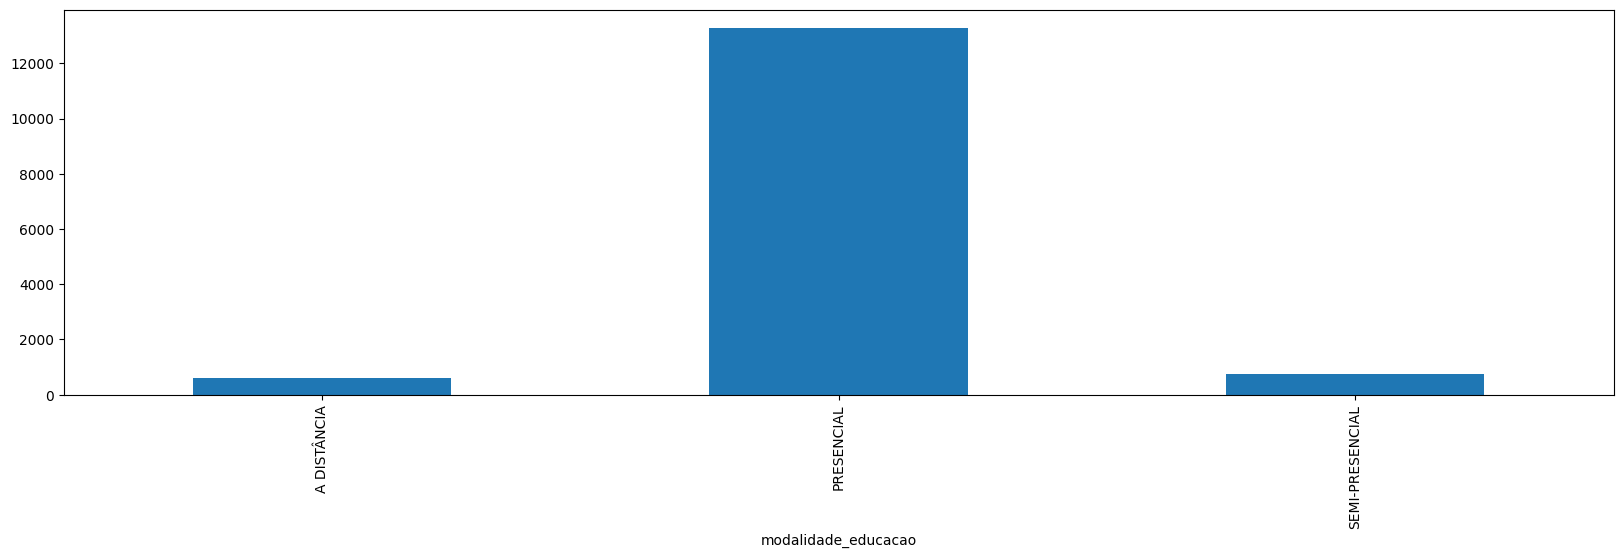

In [ ]:
dados_cluster.groupby('modalidade_educacao').size().plot(kind='bar')

<Axes: xlabel='status'>

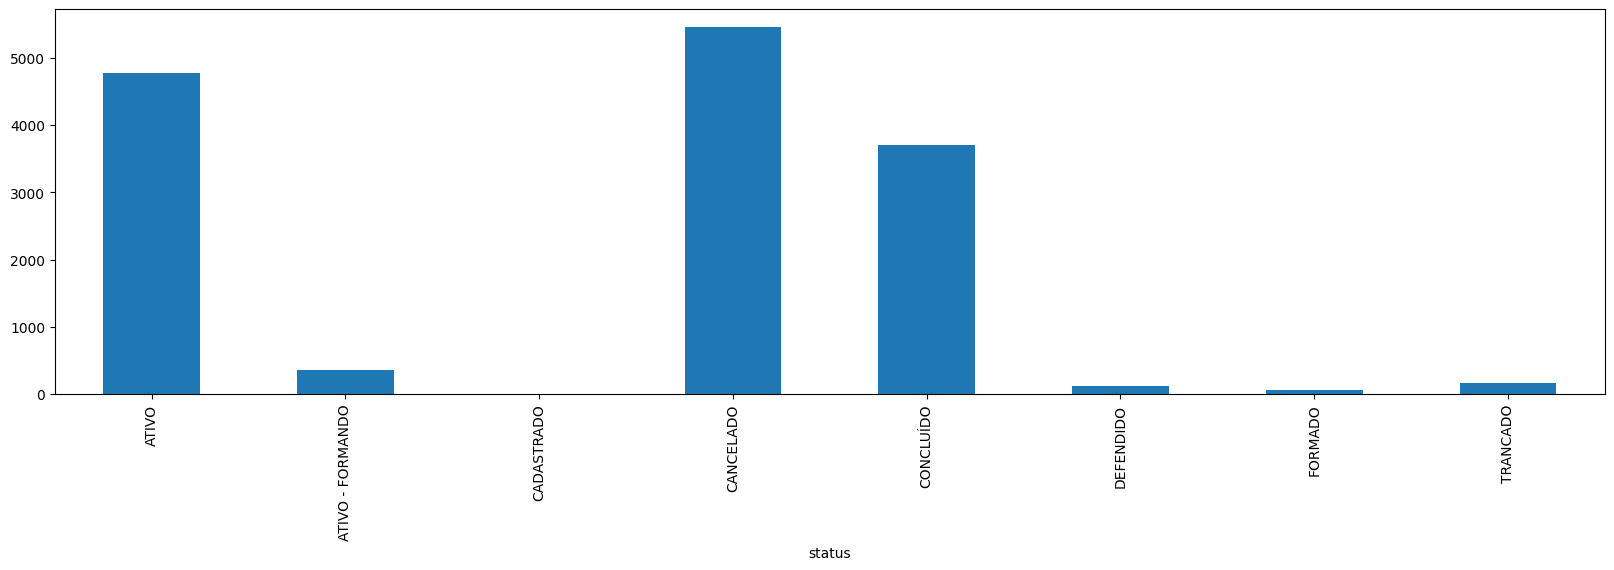

In [ ]:
dados_cluster.groupby('status').size().plot(kind='bar')

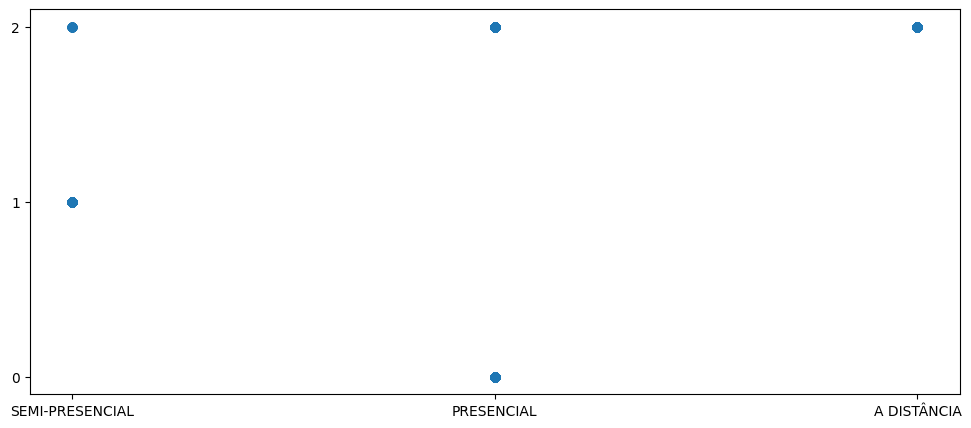

In [ ]:
x = dados_cluster['modalidade_educacao']
y = dados_cluster['cluster']

fig, ax = plt.subplots(figsize=(12,5))
plt.yticks(range(0,3))
ax.scatter(x, y)
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['nivel_ensino'], y=dados_cluster['modalidade_educacao'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['modalidade_educacao'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['nivel_ensino'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['nivel_ensino'], color=dados_cluster['modalidade_educacao'], symbol=dados_cluster['cluster'])
fig.show()

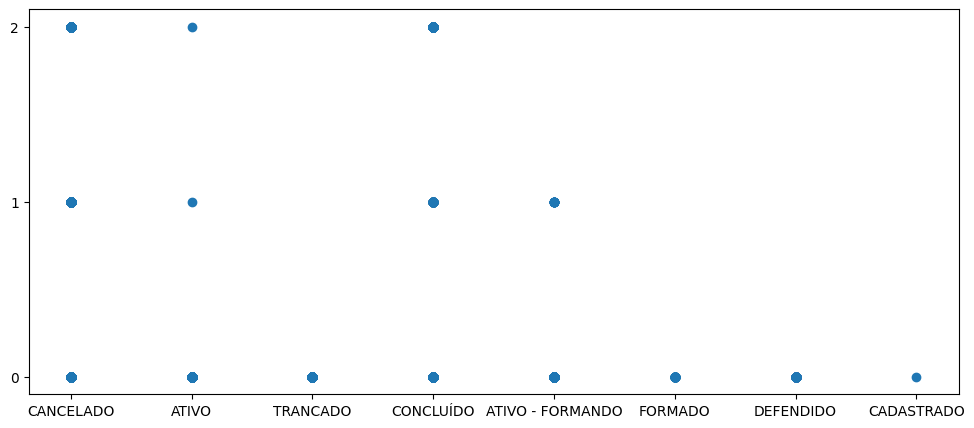

In [ ]:
x = dados_cluster['status']
y = dados_cluster['cluster']

fig, ax = plt.subplots(figsize=(12,5))
plt.yticks(range(0,3))
ax.scatter(x, y)
fig.show()

In [ ]:
# Salvando dados transformados
df = pd.DataFrame(dados_cluster)
df.to_csv('/content/discentes-2019-clusters.csv', index=False)

# CLASSIFICAÇÃO

O alvo será identificar alunos que possuem maior probabilidade de desistência. Para isso, será usado como o atributo Classe o "Status"

Importanto pacotes

In [3]:
import pandas as pd
import numpy as np
# divisão dos dados
from sklearn.model_selection import train_test_split, cross_validate
# análise de resultados
from sklearn.metrics import classification_report, confusion_matrix
# MLPs
from sklearn.neural_network import MLPClassifier
# gdown para baixar os dados
import gdown

In [ ]:
dataset

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20193012209,ABDENOR BEZERRA DOS SANTOS,M,2019,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,20190088900,ABDIAS MONTEIRO DE ANDRADE MELO,M,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
2,20190127606,ABDIAS SABINO RODRIGUES FILHO,M,2019,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
3,20195001008,ABEL GOMES DE OLIVEIRA FILHO,M,2019,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,112718836.0,CURSO DE LÍNGUA BRASILEIRA DE SINAIS (LIBRAS),PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
4,20190032217,ABI AMANA DE AQUINO BEZERRA,F,2019,2.0,SiSU,REGULAR,TRANCADO,G,GRADUAÇÃO,119512361.0,COMUNICAÇÃO SOCIAL - AUDIOVISUAL,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16015,20191024523,ZILANE SILVA BARBOSA DE OLIVEIRA,F,2019,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16016,20192013050,ZILDETE CIBELE GRANJA AMORIM SABINO,F,2019,1.0,PROCESSO SELETIVO,REGULAR,CONCLUÍDO,L,LATO SENSU,116293682.0,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,4890.0,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
16017,20190062898,ZIPORA AZENATE ALVES PEREIRA,F,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000063.0,PEDAGOGIA,PRESENCIAL,5965.0,CENTRO DE EDUCAÇÃO,5965.0,CENTRO DE EDUCAÇÃO
16018,20190116925,ZUILANE GOMES VIEIRA,F,2019,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000058.0,NUTRIÇÃO,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


In [ ]:
dataset['status'].value_counts()

CANCELADO           6838
ATIVO               4774
CONCLUÍDO           3698
ATIVO - FORMANDO     362
TRANCADO             161
DEFENDIDO            114
FORMADO               57
CADASTRADO            16
Name: status, dtype: int64

O ideal é manter apenas os com status "CANCELADO" e "CONCLUÍDO", para assim o modelo poder ser treinado para prever quem tem maior probabilidade de Concluir e quem pode ter sua matrícula cancelada.

In [4]:
mask = dataset['status'].isin(['CANCELADO', 'CONCLUÍDO'])
dataset_filtrado = dataset[mask]
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 0 to 16016
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             10536 non-null  int64  
 1   nome_discente         10536 non-null  object 
 2   sexo                  10536 non-null  object 
 3   ano_ingresso          10536 non-null  int64  
 4   periodo_ingresso      10525 non-null  float64
 5   forma_ingresso        10535 non-null  object 
 6   tipo_discente         10536 non-null  object 
 7   status                10536 non-null  object 
 8   sigla_nivel_ensino    10536 non-null  object 
 9   nivel_ensino          10536 non-null  object 
 10  id_curso              9147 non-null   float64
 11  nome_curso            9147 non-null   object 
 12  modalidade_educacao   9147 non-null   object 
 13  id_unidade            9147 non-null   float64
 14  nome_unidade          9147 non-null   object 
 15  id_unidade_gestora 

In [5]:
#Apagando nulos
dataset_filtrado = dataset_filtrado.dropna()
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 16016
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             9136 non-null   int64  
 1   nome_discente         9136 non-null   object 
 2   sexo                  9136 non-null   object 
 3   ano_ingresso          9136 non-null   int64  
 4   periodo_ingresso      9136 non-null   float64
 5   forma_ingresso        9136 non-null   object 
 6   tipo_discente         9136 non-null   object 
 7   status                9136 non-null   object 
 8   sigla_nivel_ensino    9136 non-null   object 
 9   nivel_ensino          9136 non-null   object 
 10  id_curso              9136 non-null   float64
 11  nome_curso            9136 non-null   object 
 12  modalidade_educacao   9136 non-null   object 
 13  id_unidade            9136 non-null   float64
 14  nome_unidade          9136 non-null   object 
 15  id_unidade_gestora  

In [ ]:
dataset_filtrado['status'].value_counts()

CANCELADO    5438
CONCLUÍDO    3698
Name: status, dtype: int64

In [6]:
#Colunas desejadas para a análise
atributos_analise = ['sexo', 'periodo_ingresso', 'forma_ingresso', 'tipo_discente', 'nivel_ensino', 'nome_curso', 'modalidade_educacao', 'nome_unidade','nome_unidade_gestora']
X = dataset_filtrado[atributos_analise] # Features
y = dataset_filtrado.status # Target variable
print('Features:')
X.head()

Features:


,sexo,periodo_ingresso,forma_ingresso,tipo_discente,nivel_ensino,nome_curso,modalidade_educacao,nome_unidade,nome_unidade_gestora
0,M,1.0,PROCESSO SELETIVO,REGULAR,TÉCNICO,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,M,1.0,SiSU,REGULAR,GRADUAÇÃO,HISTÓRIA,PRESENCIAL,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
6,F,1.0,SiSU,REGULAR,GRADUAÇÃO,SAÚDE COLETIVA,PRESENCIAL,CENTRO DE CIÊNCIAS DA SAÚDE,CENTRO DE CIÊNCIAS DA SAÚDE
8,M,1.0,PROCESSO SELETIVO,REGULAR,FORMAÇÃO COMPLEMENTAR,CURSO DE LÍNGUA BRASILEIRA DE SINAIS (LIBRAS),PRESENCIAL,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...","CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
10,M,1.0,PROCESSO SELETIVO,REGULAR,LATO SENSU,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [7]:
# Criando lista com colunas numéricas
tipos_numericos = ['int64', 'float64']
num_cols = X.select_dtypes(include=tipos_numericos)
num_cols = list(num_cols.columns)

# Normalizando colunas numéricas
X[num_cols] = X[num_cols].apply(minmax_scale)

# Obtendo os nomes das colunas Categóricas
tipos_categoricos = ['object']
cat_cols = X.select_dtypes(include=tipos_categoricos)

# Binarizando os atributos categóricos
categoricoToBinary = pd.get_dummies(cat_cols)
X = X.join(categoricoToBinary)
# Removendo os atributos categóricos originais
X.drop(cat_cols.columns.to_list(), axis=1, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 16016
Columns: 455 entries, periodo_ingresso to nome_unidade_gestora_UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
dtypes: float64(1), uint8(454)
memory usage: 4.3 MB


<ipython-input-7-7f9c69c907b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = X[num_cols].apply(minmax_scale)


In [ ]:
X.head()

,periodo_ingresso,sexo_F,sexo_M,sexo_false,forma_ingresso_COOPERAÇÃO INTERNACIONAL,forma_ingresso_JUDICIAL,forma_ingresso_NAO INFORMADO,forma_ingresso_PERMUTA DE SEDE,forma_ingresso_PROCESSO SELETIVO,forma_ingresso_PROCESSO SELETIVO ESPECÍFICO,...,nome_unidade_gestora_CENTRO DE CIÊNCIAS EXATAS E DA TERRA,"nome_unidade_gestora_CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",nome_unidade_gestora_CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,nome_unidade_gestora_CENTRO DE EDUCAÇÃO,nome_unidade_gestora_CENTRO DE TECNOLOGIA,nome_unidade_gestora_HOSPED - HOSPITAL DE PEDIATRIA,nome_unidade_gestora_HOSPITAL UNIVERSITARIO ANA BEZERRA,nome_unidade_gestora_HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,nome_unidade_gestora_MATERNIDADE ESCOLA JANUÁRIO CICCO,nome_unidade_gestora_UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
0,0.5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.5,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
10,0.5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print('Classe:')
y

Classe:


0        CANCELADO
2        CANCELADO
6        CANCELADO
8        CANCELADO
10       CONCLUÍDO
           ...    
16007    CANCELADO
16008    CANCELADO
16011    CANCELADO
16013    CONCLUÍDO
16016    CONCLUÍDO
Name: status, Length: 9136, dtype: object

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 9136 entries, 0 to 16016
Series name: status
Non-Null Count  Dtype 
--------------  ----- 
9136 non-null   object
dtypes: object(1)
memory usage: 400.8+ KB


## Aplicação de PCA

In [8]:
## Importando PCA do SkLearn
from sklearn.decomposition import PCA

pcas = [.25,.50,.75,.90,.95]
list_pcas = []
for porcent in pcas:
  X_pca = X.copy()
  y_pca = y.copy()
  # Reiniciando o index do Y
  y_pca.reset_index(drop=True, inplace=True)

  pca_obj = PCA(n_components=porcent, whiten=True) #porcent: usando PCA, qual porcentagem de informação eu quero
  pca_result = pca_obj.fit_transform(X_pca)

  print(f'PCA de {porcent}')
  print(f'shape: {pca_result.shape}')
  print()

  colunas = []
  for i in range(pca_result.shape[1]):
    colunas.append('pca_'+str(i))

  pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

  ## Juntando o atributo classe
  final_data = pca_dataset.join(y_pca)

  # Salvando Pessoa.csv transformado
  df_pca = pd.DataFrame(final_data)
  df_pca.to_csv(f'PCA-{porcent}.csv', index=False)
  list_pcas.append([porcent, df_pca])

PCA de 0.25
shape: (9136, 2)

PCA de 0.5
shape: (9136, 6)

PCA de 0.75
shape: (9136, 18)

PCA de 0.9
shape: (9136, 78)

PCA de 0.95
shape: (9136, 136)



## Treinamento com MLPs

In [9]:
all_accuracies = [['camadas', 'base', 'treinamento', 'accuracy']]
melhor_resultado = [0,0,0,0,0]
lista_camadas = [(30), (30,30), (30,30,30),
           (50), (50,50), (50,50,50),
           (100), (100,100), (100,100,100)]

for camadas in lista_camadas:
  funcoes_ativacao = ['identity','logistic','tanh','relu']
  algoritimos = ['lbfgs', 'sgd', 'adam']
  taxas = [0.001, 0.01]
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas, random_state=73, learning_rate_init=taxa, learning_rate='adaptive')
        for data_list_pca in list_pcas:
          pca_porcent = data_list_pca[0]
          data_pca = data_list_pca[1]
          y = data_pca.status  # Target variable
          X = data_pca.copy().drop('status', axis=1)  # Features
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=73, stratify=y)
          mlp.fit(X_train,y_train)
          y_pred = mlp.predict(X_test)
          accuracy = mlp.score(X_test, y_test)
          all_accuracies.append([camadas,
                                 f'PCA de {pca_porcent}',
                                 f'Algorit. {solver}, F. Ativ. {activation} e Tx Aprend. {taxa}',
                                 round(accuracy,4)])
          if accuracy > melhor_resultado[3]: #verificar se é a melhor acurácia até o momento
            melhor_resultado = [camadas,
                                f'PCA de {pca_porcent}',
                                f'Algorit. {solver}, F. Ativ. {activation} e Tx Aprend. {taxa}',
                                round(accuracy,4), y_test, y_pred]

data_accuracies = pd.DataFrame(all_accuracies[1:], columns=all_accuracies[0])
matrix = data_accuracies.pivot(index=['base', 'treinamento'], columns='camadas', values='accuracy')
# Exibir a matriz
print(matrix.to_string(index=True, header=True))
print()
print('------- MELHOR RESULTADO --------')
print(f'{melhor_resultado[0]}, {melhor_resultado[1]} e {melhor_resultado[2]}')
print(f'accuracy: {melhor_resultado[3]}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

camadas                                                               30  (30, 30)  (30, 30, 30)      50  (50, 50)  (50, 50, 50)     100  (100, 100)  (100, 100, 100)
base        treinamento                                                                                                                                              
PCA de 0.25 Algorit. adam, F. Ativ. identity e Tx Aprend. 0.001   0.6293    0.6293        0.6293  0.6293    0.6370        0.6571  0.6308      0.6410           0.6571
            Algorit. adam, F. Ativ. identity e Tx Aprend. 0.01    0.6406    0.6366        0.6308  0.6541    0.6410        0.6399  0.6410      0.6501           0.6293
            Algorit. adam, F. Ativ. logistic e Tx Aprend. 0.001   0.6410    0.6468        0.6713  0.6308    0.6417        0.6545  0.6571      0.6454           0.6786
            Algorit. adam, F. Ativ. logistic e Tx Aprend. 0.01    0.7581    0.7734        0.7238  0.7705    0.7742        0.7738  0.7588      0.7793           0.6983
    

Outros testes

In [ ]:
all_accuracies = [['camadas', 'base', 'treinamento', 'accuracy']]
melhor_resultado = [0,0,0,0,0]
lista_camadas = [(30), (30,30), (30,30,30),
           (50), (50,50), (50,50,50),
           (100), (100,100), (100,100,100)]

for camadas in lista_camadas:
  funcoes_ativacao = ['tanh']
  algoritimos = ['adam']
  taxas = [0.001, 0.005, 0.01]
  for solver in algoritimos:
    for activation in funcoes_ativacao:
      for taxa in taxas:
        mlp = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=camadas, random_state=73, learning_rate_init=taxa, learning_rate='adaptive')
        for data_list_pca in list_pcas:
          pca_porcent = data_list_pca[0]
          data_pca = data_list_pca[1]
          y = data_pca.status  # Target variable
          X = data_pca.copy().drop('status', axis=1)  # Features
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=73, stratify=y)
          mlp.fit(X_train,y_train)
          y_pred = mlp.predict(X_test)
          accuracy = mlp.score(X_test, y_test)
          all_accuracies.append([camadas,
                                 f'PCA de {pca_porcent}',
                                 f'Algorit. {solver}, F. Ativ. {activation} e Tx Aprend. {taxa}',
                                 round(accuracy,4)])
          if accuracy > melhor_resultado[3]: #verificar se é a melhor acurácia até o momento
            melhor_resultado = [camadas,
                                f'PCA de {pca_porcent}',
                                f'Algorit. {solver}, F. Ativ. {activation} e Tx Aprend. {taxa}',
                                round(accuracy,4), y_test, y_pred]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

In [ ]:
data_accuracies = pd.DataFrame(all_accuracies[1:], columns=all_accuracies[0])
matrix = data_accuracies.pivot(index=['base', 'treinamento'], columns='camadas', values='accuracy')
# Exibir a matriz
print(matrix.to_string(index=True, header=True))
print()
print('------- MELHOR RESULTADO --------')
print(f'{melhor_resultado[0]}, {melhor_resultado[1]} e {melhor_resultado[2]}')
print(f'accuracy: {melhor_resultado[3]}')

camadas                                                          30  (30, 30)  (30, 30, 30)      50  (50, 50)  (50, 50, 50)     100  (100, 100)  (100, 100, 100)
base        treinamento                                                                                                                                         
PCA de 0.25 Algorit. adam, F. Ativ. tanh e Tx Aprend. 0.001  0.6961    0.7578        0.7764  0.6855    0.7709        0.7789  0.7041      0.7716           0.7753
            Algorit. adam, F. Ativ. tanh e Tx Aprend. 0.005  0.7537    0.7764        0.7709  0.7669    0.7716        0.7756  0.7676      0.7771           0.7771
            Algorit. adam, F. Ativ. tanh e Tx Aprend. 0.01   0.7676    0.7676        0.7771  0.7661    0.7745        0.7683  0.7618      0.7804           0.7603
PCA de 0.5  Algorit. adam, F. Ativ. tanh e Tx Aprend. 0.001  0.7822    0.7796        0.7822  0.7811    0.7858        0.7829  0.7855      0.7796           0.7793
            Algorit. adam, F. Ativ

In [ ]:
y_test = melhor_resultado[4]
y_pred = melhor_resultado[5]
print(confusion_matrix(y_test,y_pred))

[[1361  271]
 [ 293  816]]


## Conclusões

A utilização da base de dados com aplicação de PCA de 0.95 juntamente com o treinamento de camadas (100, 100), Algoritmo adam, Função de ativação tanh e taxa de aprendizado 0.001, obteve um modelo de melhor acurácia. Também é visto que não há um desbalanceamento tão grande no erro.
Logo, esse modelo poderia ser utilizado para fazer uma predição inicial dos alunos que têm tendência a desistir do curso.